In [1]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('words')
from tqdm import tqdm
import numpy as np
import pickle
from collections import Counter
from scipy.sparse import lil_matrix
import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
from scipy.stats import chi2
import numpy as np
from scipy.stats import entropy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Preprocessing

In [2]:
stop_words = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [3]:
def preprocess(sentence):
    sentence = re.sub(r'<.*?>', '', sentence)
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub(r'\d', '', sentence)
    word_tokens = word_tokenize(sentence)
    sentence = [w for w in word_tokens if not w in stop_words]
    sentence = [lemmatizer.lemmatize(w) for w in sentence]
    
    return sentence


In [ ]:
with open('..\English\eng_wikipedia_2016_300K\eng_wikipedia_2016_300K-sentences.txt', 'r', encoding='utf-8') as file:
    sentences = file.readlines()

preprocessed_sentences = []
for sentence in tqdm(sentences):
    preprocessed_sentences.append(preprocess(sentence))

with open('..\preprocessed_sentences.txt', 'w') as file:
    for sentence in preprocessed_sentences:
        file.write(' '.join(sentence) + '\n')

100%|██████████| 300000/300000 [01:31<00:00, 3268.99it/s]


In [5]:
def vocabulary(preprocessed_sentences):
    word_counts = Counter()
    for sentence in preprocessed_sentences:
        word_counts.update(sentence)
    
    vocab = list(word_counts.keys())
    vocab_size = len(vocab)
    word2index = {word: i for i, word in enumerate(vocab)}
    return vocab, vocab_size, word2index

    

In [6]:
vocab, vocab_size, word2index = vocabulary(preprocessed_sentences)

In [23]:
vocab_size

162625

In [48]:
def construct_co_occurrence_matrix(preprocessed_sentences, window_size):
    co_occurrence_matrix = lil_matrix((vocab_size, vocab_size), dtype=np.float64)
    for sentence in tqdm(preprocessed_sentences):
        for i, word in enumerate(sentence):
            for j in range(max(i - window_size, 0), min(i + window_size, len(sentence))):
                if i != j:
                    co_occurrence_matrix[word2index[word], word2index[sentence[j]]] += 1
    
    return co_occurrence_matrix


In [ ]:
for window_size in range(2, 11):
    co_occurrence_matrix = construct_co_occurrence_matrix(preprocessed_sentences, window_size)
    with open(f'../co_occurrence_matrices/co_occurrence_matrix_window_{window_size}.pkl', 'wb') as file:
        pickle.dump(co_occurrence_matrix, file)

100%|██████████| 300000/300000 [02:25<00:00, 2061.17it/s]


In [ ]:
pickle.dump(word2index, open('../word2index.pkl', 'wb'))

### Best Window Size

In [ ]:
def compute_svd_singular_values(matrix, k=50):
    svd = TruncatedSVD(n_components=k, random_state=42)
    svd.fit(matrix)
    return svd.singular_values_

In [ ]:
window_2 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_2.pkl', 'rb'))
window_3 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_5.pkl', 'rb'))
window_4 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_5.pkl', 'rb'))
window_5 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_5.pkl', 'rb'))
window_6 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_6.pkl', 'rb'))
window_7 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_7.pkl', 'rb'))
window_8 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_8.pkl', 'rb'))
window_9 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_9.pkl', 'rb'))
window_10 = pickle.load(open('../co_occurrence_matrices/co_occurrence_matrix_window_10.pkl', 'rb'))

Eigenvalue decay rate

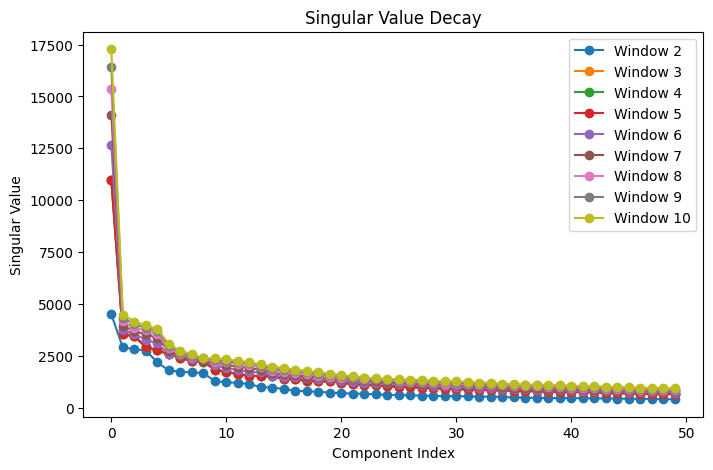

In [ ]:
singular_values_2 = compute_svd_singular_values(window_2, k=50)
singular_values_3 = compute_svd_singular_values(window_3, k=50)
singular_values_4 = compute_svd_singular_values(window_4, k=50)
singular_values_5 = compute_svd_singular_values(window_5, k=50)
singular_values_6 = compute_svd_singular_values(window_6, k=50)
singular_values_7 = compute_svd_singular_values(window_7, k=50)
singular_values_8 = compute_svd_singular_values(window_8, k=50)
singular_values_9 = compute_svd_singular_values(window_9, k=50)
singular_values_10 = compute_svd_singular_values(window_10, k=50)

plt.figure(figsize=(8, 5))
plt.plot(singular_values_2, marker='o', label='Window 2')
plt.plot(singular_values_3, marker='o', label='Window 3')
plt.plot(singular_values_4, marker='o', label='Window 4')
plt.plot(singular_values_5, marker='o', label='Window 5')
plt.plot(singular_values_6, marker='o', label='Window 6')
plt.plot(singular_values_7, marker='o', label='Window 7')
plt.plot(singular_values_8, marker='o', label='Window 8')
plt.plot(singular_values_9, marker='o', label='Window 9')
plt.plot(singular_values_10, marker='o', label='Window 10')
plt.xlabel("Component Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Decay")
plt.legend()
plt.show()


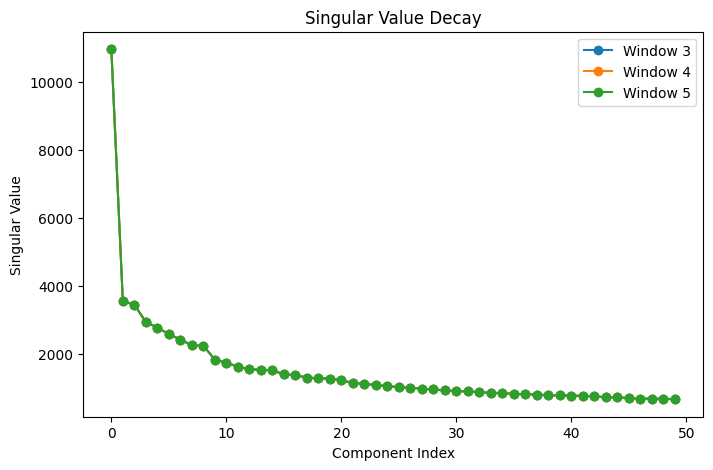

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(singular_values_3, marker='o', label='Window 3')
plt.plot(singular_values_4, marker='o', label='Window 4')
plt.plot(singular_values_5, marker='o', label='Window 5')
plt.xlabel("Component Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Decay")
plt.legend()
plt.show()

KL Divergence

In [ ]:
def compute_kl_divergence(matrix1, matrix2):
    p = matrix1.sum(axis=1).A1 
    q = matrix2.sum(axis=1).A1

    p = p / np.sum(p)
    q = q / np.sum(q)
    
    epsilon = 1e-10
    p = np.maximum(p, epsilon)
    q = np.maximum(q, epsilon)
    
    js_div = jensenshannon(p, q)
    
    return js_div

In [16]:
kl_divergence_2_3 = compute_kl_divergence(window_2, window_3)
kl_divergence_3_4 = compute_kl_divergence(window_2, window_4)
kl_divergence_4_5 = compute_kl_divergence(window_2, window_5)
kl_divergence_5_6 = compute_kl_divergence(window_2, window_6)
kl_divergence_6_7 = compute_kl_divergence(window_2, window_7)
kl_divergence_7_8 = compute_kl_divergence(window_2, window_8)
kl_divergence_8_9 = compute_kl_divergence(window_2, window_9)
kl_divergence_9_10 = compute_kl_divergence(window_2, window_10)

print(f"KL Divergence between window 2 and window 3: {kl_divergence_2_3}")
print(f"KL Divergence between window 3 and window 4: {kl_divergence_3_4}")
print(f"KL Divergence between window 4 and window 5: {kl_divergence_4_5}")
print(f"KL Divergence between window 5 and window 6: {kl_divergence_5_6}")
print(f"KL Divergence between window 6 and window 7: {kl_divergence_6_7}")
print(f"KL Divergence between window 7 and window 8: {kl_divergence_7_8}")
print(f"KL Divergence between window 8 and window 9: {kl_divergence_8_9}")
print(f"KL Divergence between window 9 and window 10: {kl_divergence_9_10}")

KL Divergence between window 2 and window 3: 0.01681496934621766
KL Divergence between window 3 and window 4: 0.01681496934621766
KL Divergence between window 4 and window 5: 0.01681496934621766
KL Divergence between window 5 and window 6: 0.019849864509691003
KL Divergence between window 6 and window 7: 0.022540440728076334
KL Divergence between window 7 and window 8: 0.024963528553191883
KL Divergence between window 8 and window 9: 0.027169245597886194
KL Divergence between window 9 and window 10: 0.02916597967858617


In [ ]:
word2index = pickle.load(open('..\word2index.pkl', 'rb'))

Entropy

In [ ]:
def compute_entropy(matrix):
    co_occurrence_counts = matrix.sum(axis=1).A1  
    total_counts = np.sum(co_occurrence_counts)
    
    probabilities = co_occurrence_counts / total_counts

    epsilon = 1e-10
    probabilities = np.maximum(probabilities, epsilon)
    
    return entropy(probabilities)


In [53]:
entropy_value = compute_entropy(window_2)
print(f"Entropy for window 2: {entropy_value}")

entropy_value = compute_entropy(window_3)
print(f"Entropy for window 3: {entropy_value}")

entropy_value = compute_entropy(window_4)
print(f"Entropy for window 4: {entropy_value}")

entropy_value = compute_entropy(window_5)
print(f"Entropy for window 5: {entropy_value}")

entropy_value = compute_entropy(window_6)
print(f"Entropy for window 6: {entropy_value}")

entropy_value = compute_entropy(window_7)
print(f"Entropy for window 7: {entropy_value}")

entropy_value = compute_entropy(window_8)
print(f"Entropy for window 8: {entropy_value}")

entropy_value = compute_entropy(window_9)
print(f"Entropy for window 9: {entropy_value}")

entropy_value = compute_entropy(window_10)
print(f"Entropy for window 10: {entropy_value}")

Entropy for window 2: 9.172345891183456
Entropy for window 3: 9.172158368700712
Entropy for window 4: 9.172158368700712
Entropy for window 5: 9.172158368700712
Entropy for window 6: 9.17234897603838
Entropy for window 7: 9.172643306376363
Entropy for window 8: 9.172866753900024
Entropy for window 9: 9.17302084617408
Entropy for window 10: 9.17312727867475
